In [1]:
!pip install kaggle

In [2]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mamdouhjr","key":"cd38a9c840d537950c75fa37d22d64e9"}'}

In [4]:
!mkdir -p ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download asadullahgalib/guava-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/asadullahgalib/guava-disease-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 1.50G/1.52G [00:15<00:00, 49.9MB/s]
100% 1.52G/1.52G [00:15<00:00, 103MB/s] 


In [8]:
!unzip guava-disease-dataset

Archive:  guava-disease-dataset.zip
  inflating: GuavaDiseaseDataset/GuavaDiseaseDataset/test/Anthracnose/101_unsharp_clahe_augmented_5.png  
  inflating: GuavaDiseaseDataset/GuavaDiseaseDataset/test/Anthracnose/103_unsharp_clahe_augmented_7.png  
  inflating: GuavaDiseaseDataset/GuavaDiseaseDataset/test/Anthracnose/107_unsharp_clahe_augmented_3.png  
  inflating: GuavaDiseaseDataset/GuavaDiseaseDataset/test/Anthracnose/107_unsharp_clahe_augmented_6.png  
  inflating: GuavaDiseaseDataset/GuavaDiseaseDataset/test/Anthracnose/108_unsharp_clahe_augmented_5.png  
  inflating: GuavaDiseaseDataset/GuavaDiseaseDataset/test/Anthracnose/109_unsharp_clahe_augmented_1.png  
  inflating: GuavaDiseaseDataset/GuavaDiseaseDataset/test/Anthracnose/111_unsharp_clahe_augmented_0.png  
  inflating: GuavaDiseaseDataset/GuavaDiseaseDataset/test/Anthracnose/111_unsharp_clahe_augmented_5.png  
  inflating: GuavaDiseaseDataset/GuavaDiseaseDataset/test/Anthracnose/112_unsharp_clahe_augmented_0.png  
  inflatin

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19, MobileNetV2, ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D , Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

img_width, img_height = 224, 224
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/GuavaDiseaseDataset/GuavaDiseaseDataset/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    '/content/GuavaDiseaseDataset/GuavaDiseaseDataset/test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    '/content/GuavaDiseaseDataset/GuavaDiseaseDataset/val',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 2647 images belonging to 3 classes.
Found 382 images belonging to 3 classes.
Found 755 images belonging to 3 classes.


In [10]:
import math

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


166/166 ━━━━━━━━━━━━━━━━━━━━ 79s 401ms/step - accuracy: 0.7040 - loss: 0.6979 - val_accuracy: 0.8979 - val_loss: 0.2811
Epoch 2/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 59s 321ms/step - accuracy: 0.9421 - loss: 0.1868 - val_accuracy: 0.9424 - val_loss: 0.1532
Epoch 3/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 61s 358ms/step - accuracy: 0.9482 - loss: 0.1519 - val_accuracy: 0.8927 - val_loss: 0.2805
Epoch 4/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 57s 327ms/step - accuracy: 0.9492 - loss: 0.1252 - val_accuracy: 0.9372 - val_loss: 0.1421
Epoch 5/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 78s 310ms/step - accuracy: 0.9623 - loss: 0.1106 - val_accuracy: 0.9581 - val_loss: 0.1362
Epoch 6/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 83s 314ms/step - accuracy: 0.9554 - loss: 0.1238 - val_accuracy: 0.9450 - val_loss: 0.1160
Epoch 7/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 53s 303ms/step - accuracy: 0.9620 - loss: 0.1054 - val_accuracy: 0.9764 - val_loss: 0.0818
Epoch 8/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 55s 314ms/step - accuracy: 0.9658 - loss: 0.0862 - val

In [11]:

train_loss, train_accuracy = model.evaluate(train_generator)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

166/166 ━━━━━━━━━━━━━━━━━━━━ 51s 306ms/step - accuracy: 0.9803 - loss: 0.0529
Training Accuracy: 98.30%
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.9577 - loss: 0.1197
Validation Accuracy: 96.86%
48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.9446 - loss: 0.1239
Test Accuracy: 96.03%


In [12]:
y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true = test_generator.classes
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))

48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 120ms/step
               precision    recall  f1-score   support

  Anthracnose       1.00      0.94      0.97       308
    fruit_fly       0.93      0.97      0.95       262
healthy_guava       0.94      0.97      0.95       185

     accuracy                           0.96       755
    macro avg       0.96      0.96      0.96       755
 weighted avg       0.96      0.96      0.96       755



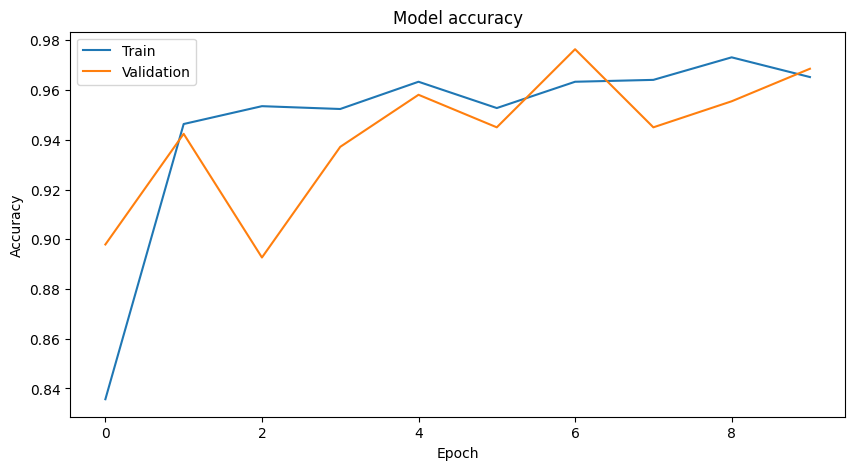

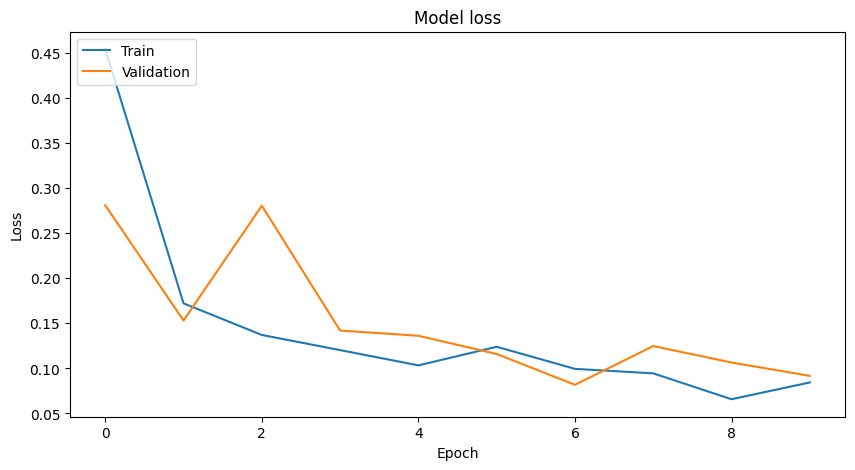

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 247ms/step


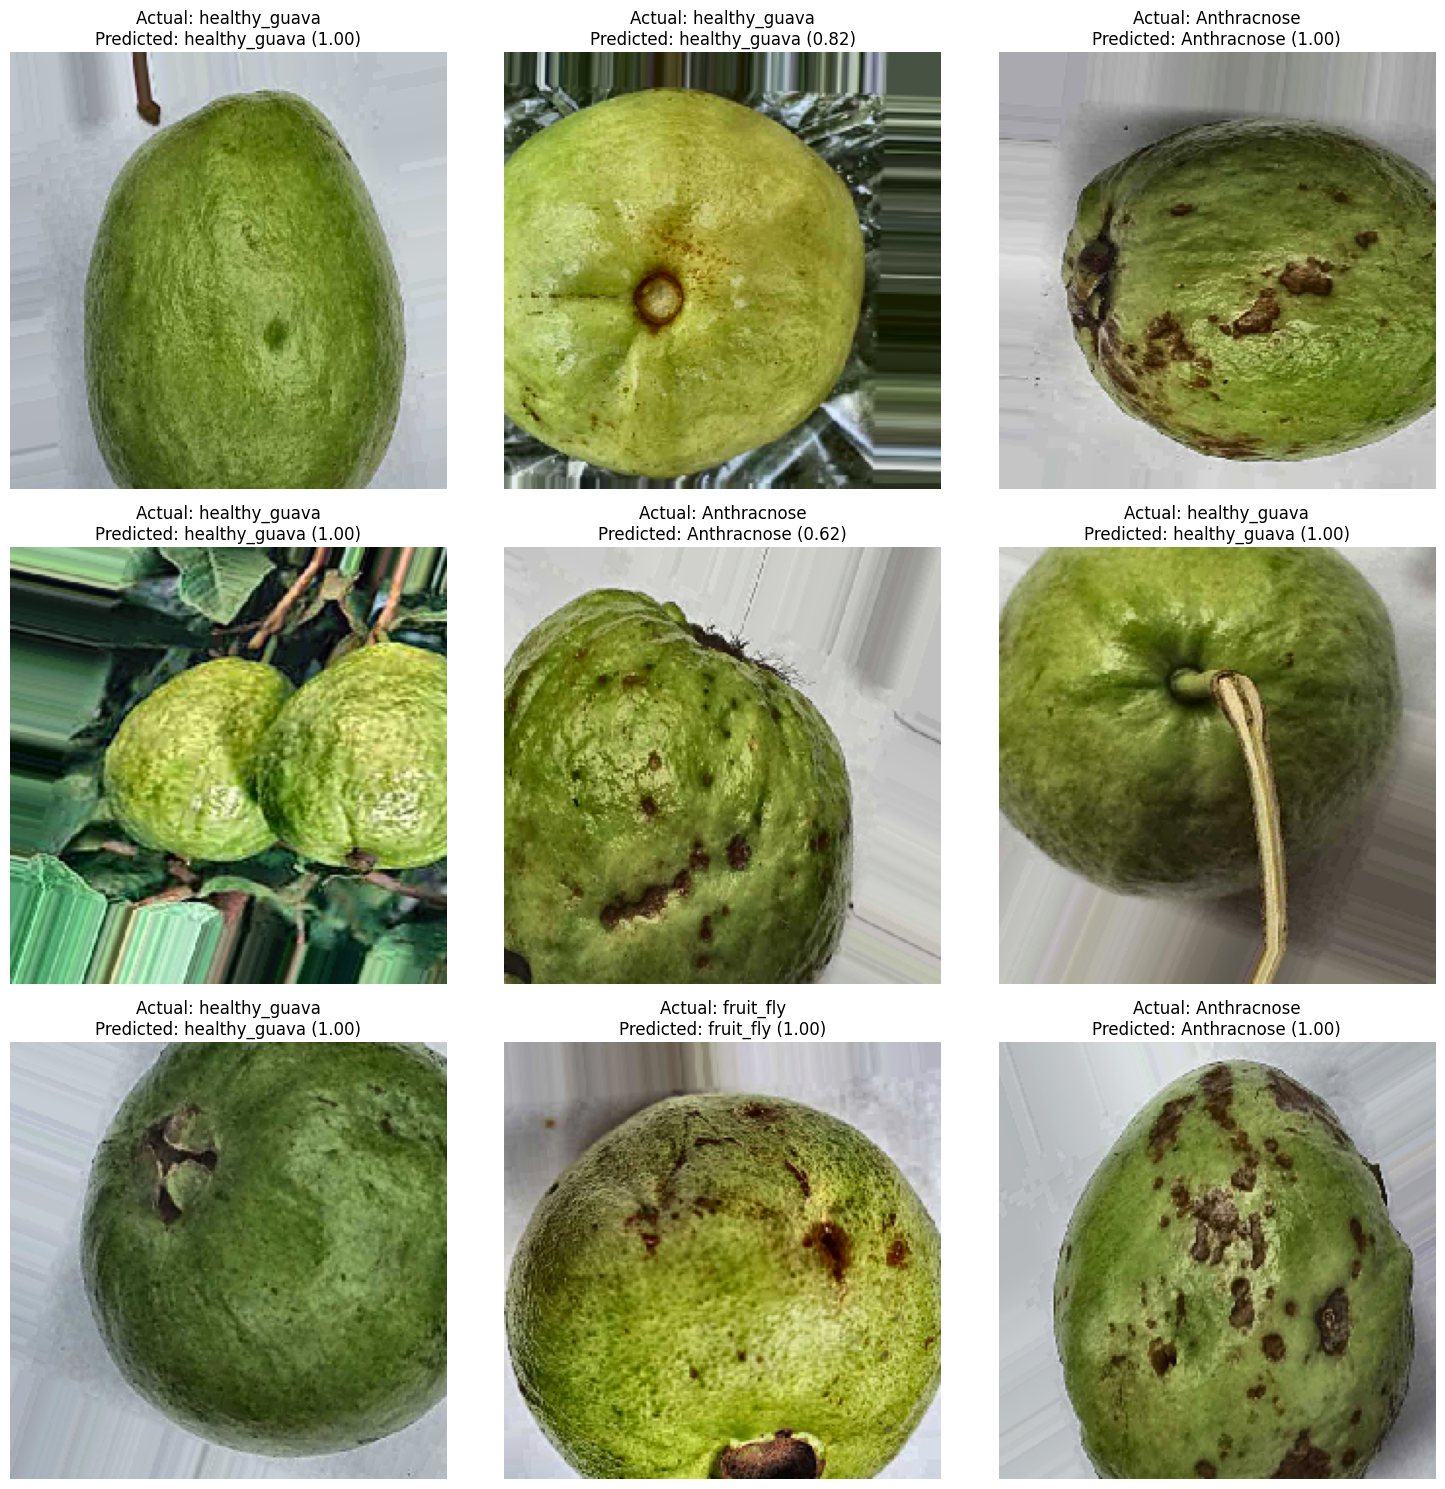

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


class_indices = test_generator.class_indices
class_labels = list(class_indices.keys())

y_pred_prob = model.predict(test_generator, steps=len(test_generator))

num_images_to_display = 9

total_images = len(test_generator) * test_generator.batch_size
random_indices = np.random.choice(total_images, num_images_to_display, replace=False)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for idx, image_index in enumerate(random_indices):
    row = idx // 3
    col = idx % 3

    true_class_index = np.argmax(test_generator[image_index // test_generator.batch_size][1][image_index % test_generator.batch_size])
    true_class = class_labels[true_class_index]
    predicted_class = class_labels[np.argmax(y_pred_prob[image_index])]
    confidence = np.max(y_pred_prob[image_index])

    image = test_generator[image_index // test_generator.batch_size][0][image_index % test_generator.batch_size]

    axes[row, col].imshow(image)
    axes[row, col].set_title(f"Actual: {true_class}\nPredicted: {predicted_class} ({confidence:.2f})")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


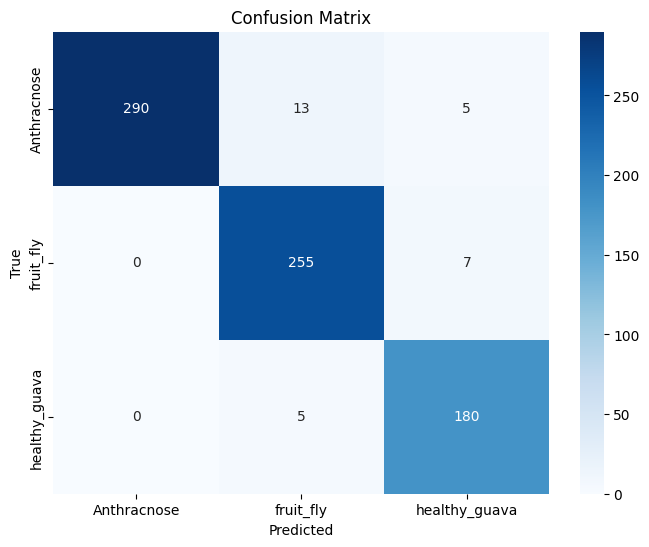

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [15]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model2 = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model2.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 67s 351ms/step - accuracy: 0.7967 - loss: 0.5225 - val_accuracy: 0.9607 - val_loss: 0.1126
Epoch 2/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 66s 277ms/step - accuracy: 0.9541 - loss: 0.1229 - val_accuracy: 0.9660 - val_loss: 0.0695
Epoch 3/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 83s 288ms/step - accuracy: 0.9579 - loss: 0.0948 - val_accuracy: 0.9843 - val_loss: 0.0492
Epoch 4/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 54s 314ms/step - accuracy: 0.9763 - loss: 0.0658 - val_accuracy: 0.9634 - val_loss: 0.0762
Epoch 5/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 78s 288ms/step - accuracy: 0.9695 - loss: 0.0780 - val_accuracy: 0.9895 - val_loss: 0.0430
Epoch 6/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 58s 337ms/step - accuracy: 0.9857 - loss: 0.0423 - val_accuracy: 0.9843 - val_loss: 0.0368
Epoch 7/10
166/166 ━━━━━━━━━━━━━━━━━━━━ 48s 276ms/step - accuracy: 0.9759 - loss: 0.0635 - val_accuracy: 0.9843 - val_loss: 0.0311
Epoch 8/10
166/166 ━━━━━━━━━━━━━

In [16]:
train_loss, train_accuracy = model2.evaluate(train_generator)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

val_loss, val_accuracy = model2.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

test_loss, test_accuracy = model2.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

166/166 ━━━━━━━━━━━━━━━━━━━━ 46s 277ms/step - accuracy: 0.9925 - loss: 0.0217
Training Accuracy: 99.21%
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.9967 - loss: 0.0124
Validation Accuracy: 99.21%
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 148ms/step - accuracy: 0.9883 - loss: 0.0366
Test Accuracy: 98.28%


In [17]:
y_pred = model2.predict(test_generator, steps=len(test_generator))
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true = test_generator.classes
print(classification_report(y_true, y_pred_classes, target_names=list(test_generator.class_indices.keys())))

48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step
               precision    recall  f1-score   support

  Anthracnose       0.99      0.99      0.99       308
    fruit_fly       1.00      0.96      0.98       262
healthy_guava       0.95      1.00      0.97       185

     accuracy                           0.98       755
    macro avg       0.98      0.98      0.98       755
 weighted avg       0.98      0.98      0.98       755



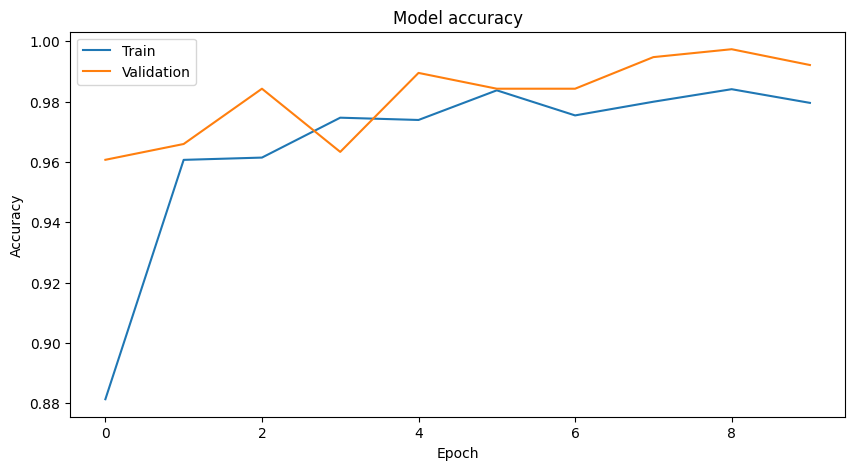

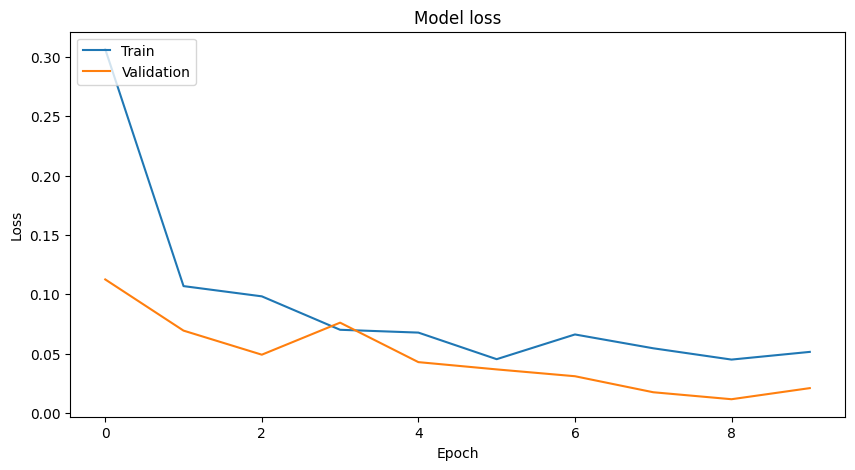

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step


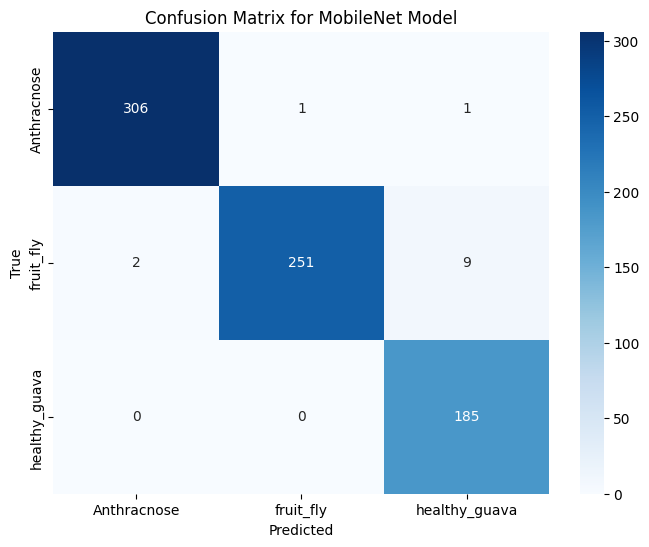

In [19]:
y_pred = model2.predict(test_generator, steps=len(test_generator))
y_pred_classes = tf.argmax(y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for MobileNet Model")
plt.show()

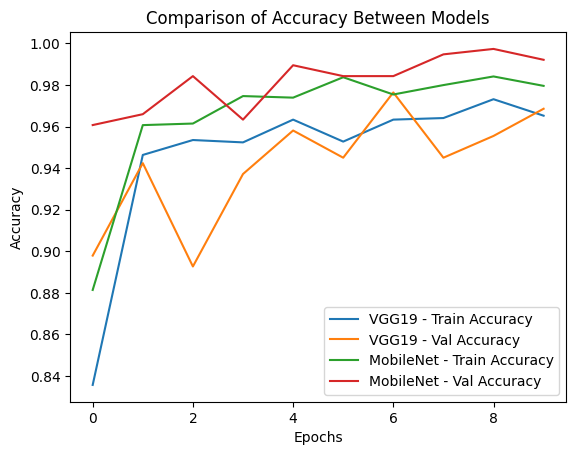

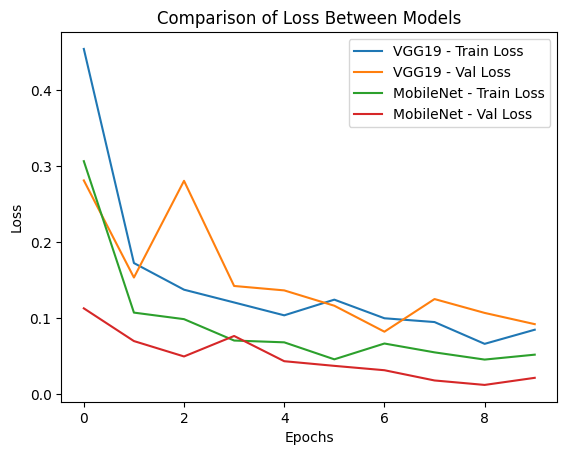

In [20]:
import matplotlib.pyplot as plt

def plot_metric(history, history2, metric, model_names):
    plt.plot(history.history[metric], label=f"{model_names[0]} - Train {metric.capitalize()}")
    plt.plot(history.history[f"val_{metric}"], label=f"{model_names[0]} - Val {metric.capitalize()}")
    plt.plot(history2.history[metric], label=f"{model_names[1]} - Train {metric.capitalize()}")
    plt.plot(history2.history[f"val_{metric}"], label=f"{model_names[1]} - Val {metric.capitalize()}")

    plt.title(f"Comparison of {metric.capitalize()} Between Models")
    plt.xlabel("Epochs")
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.show()

model_names = ["VGG19", "MobileNet"]

plot_metric(history, history2, "accuracy", model_names)

plot_metric(history, history2, "loss", model_names)


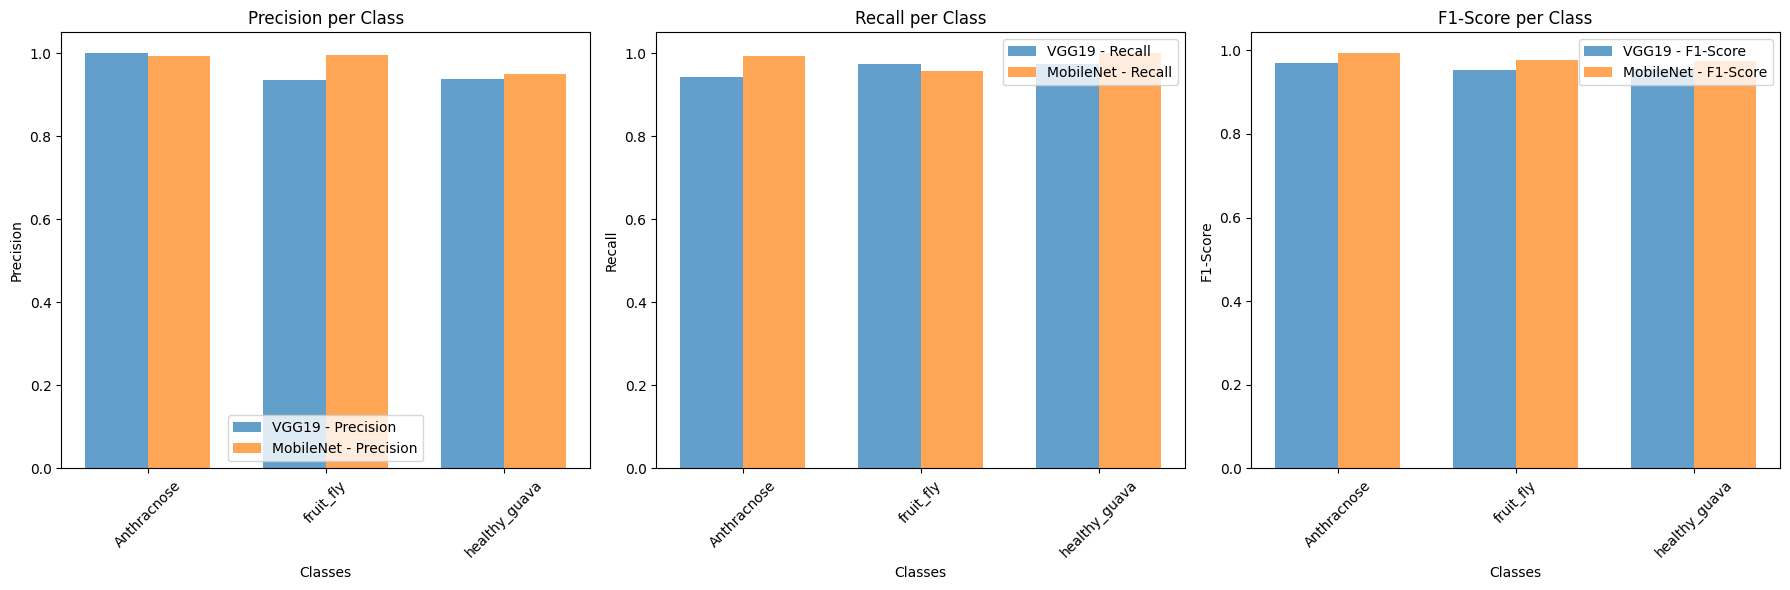

In [29]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(classes))
width = 0.35


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].bar(x - width/2, precision1, width, label='VGG19 - Precision', alpha=0.7)
axes[0].bar(x + width/2, precision2, width, label='MobileNet - Precision', alpha=0.7)
axes[0].set_title('Precision per Class')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Precision')
axes[0].set_xticks(x)
axes[0].set_xticklabels(classes, rotation=45)
axes[0].legend()

axes[1].bar(x - width/2, recall1, width, label='VGG19 - Recall', alpha=0.7)
axes[1].bar(x + width/2, recall2, width, label='MobileNet - Recall', alpha=0.7)
axes[1].set_title('Recall per Class')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Recall')
axes[1].set_xticks(x)
axes[1].set_xticklabels(classes, rotation=45)
axes[1].legend()

axes[2].bar(x - width/2, f1_score1, width, label='VGG19 - F1-Score', alpha=0.7)
axes[2].bar(x + width/2, f1_score2, width, label='MobileNet - F1-Score', alpha=0.7)
axes[2].set_title('F1-Score per Class')
axes[2].set_xlabel('Classes')
axes[2].set_ylabel('F1-Score')
axes[2].set_xticks(x)
axes[2].set_xticklabels(classes, rotation=45)
axes[2].legend()

plt.tight_layout()
plt.show()


In [23]:
import time
import numpy as np

def measure_prediction_time(model, generator, num_batches=10):
    total_time = 0
    batch_sizes = []

    for _ in range(num_batches):
        images, _ = next(generator)
        batch_sizes.append(images.shape[0])

        start_time = time.time()
        model.predict(images)
        end_time = time.time()

        total_time += (end_time - start_time)

    avg_time_per_image = total_time / sum(batch_sizes)
    return total_time, avg_time_per_image

total_time_vgg19, avg_time_per_image_vgg19 = measure_prediction_time(model, test_generator)
total_time_mobilenet, avg_time_per_image_mobilenet = measure_prediction_time(model2, test_generator)

print(f"VGG19 - Total Prediction Time for {10} batches: {total_time_vgg19:.4f} seconds")
print(f"VGG19 - Average Prediction Time per Image: {avg_time_per_image_vgg19:.6f} seconds")

print(f"MobileNet - Total Prediction Time for {10} batches: {total_time_mobilenet:.4f} seconds")
print(f"MobileNet - Average Prediction Time per Image: {avg_time_per_image_mobilenet:.6f} seconds")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
VGG19 - Total Prediction Time for 10 batches: 2.1601 seconds
VGG19 - Average Prediction Time per Image: 0.013501 seconds
MobileNet - Total Prediction Time for 10 batches: 2.1165 seconds
MobileNet - Average Prediction Time per Image: 0.013228

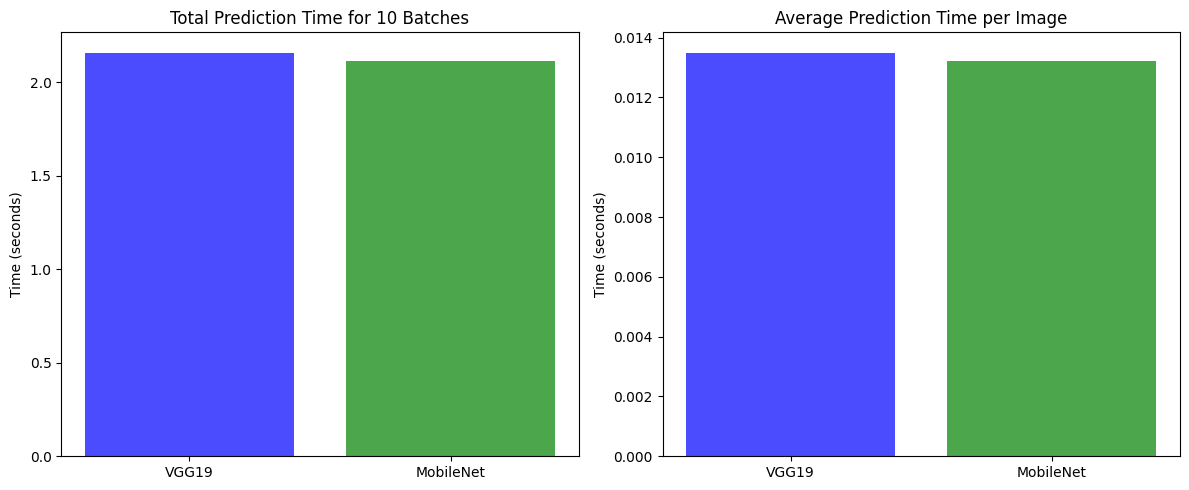

In [24]:
import matplotlib.pyplot as plt

models = ["VGG19", "MobileNet"]
total_times = [total_time_vgg19, total_time_mobilenet]
avg_times = [avg_time_per_image_vgg19, avg_time_per_image_mobilenet]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(models, total_times, color=['blue', 'green'], alpha=0.7)
axes[0].set_title("Total Prediction Time for 10 Batches")
axes[0].set_ylabel("Time (seconds)")


axes[1].bar(models, avg_times, color=['blue', 'green'], alpha=0.7)
axes[1].set_title("Average Prediction Time per Image")
axes[1].set_ylabel("Time (seconds)")


plt.tight_layout()
plt.show()


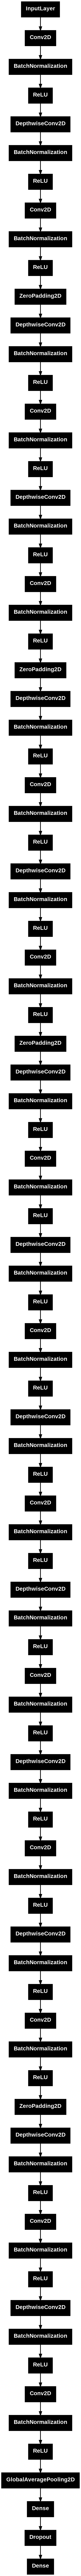

In [25]:
from keras.utils import plot_model

plot_model(model, to_file='vgg19_model_simple.png', show_shapes=False, show_layer_names=False)
plot_model(model2, to_file='mobilenet_model_simple.png', show_shapes=False, show_layer_names=False)


In [26]:
print(f"VGG19 Model Size: {model.count_params()} parameters")
print(f"MobileNet Model Size: {model2.count_params()} parameters")

VGG19 Model Size: 20552771 parameters
MobileNet Model Size: 3755203 parameters
